# Insight Data Science - Data Challenge \#1

In [127]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

Let's first load the Wisconsin Breast Cancer Dataset (previously converted to CSV format) downloaded from: 

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original)

In [2]:
data = pd.read_csv('breast-cancer-wisconsin.csv',index_col=0)
data.head(6)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
ID,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
1017122,8,10,10,8,7,10,9,7,1,4


Let's print a list of the columns and their corresponding datatypes in the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 60.1+ KB


We confirm that there are 699 instances in the dataset. Let's sort the dataset by ID

In [4]:
data = data.sort_values(by=['ID'])
data.head(3)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
ID,,,,,,,,,,
61634,5,4,3,1,2,?,2,3,1,2
63375,9,1,2,6,4,10,7,7,2,4
76389,10,4,7,2,2,8,6,1,1,4


### Data pre-processing

Let's first, merely for convenience, change the labels for the categories "Class" column to:
- **0 for benign**, and 
- **1 for malignant**,

and see the result

In [5]:
data['Class'] = data['Class'].replace(to_replace=2,value=0)
data['Class'] = data['Class'].replace(to_replace=4,value=1)

data.head(3)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
ID,,,,,,,,,,
61634,5,4,3,1,2,?,2,3,1,0
63375,9,1,2,6,4,10,7,7,2,1
76389,10,4,7,2,2,8,6,1,1,1


In [162]:
data[data['Class']==1].count()

Clump Thickness                239
Uniformity of Cell Size        239
Uniformity of Cell Shape       239
Marginal Adhesion              239
Single Epithelial Cell Size    239
Bare Nuclei                    239
Bland Chromatin                239
Normal Nucleoli                239
Mitoses                        239
Class                          239
dtype: int64

According to the description of the dataset (see dataset summary table [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Original) "UCI Machine Learning Repository")), there are 16 instances that contain a single missing (i.e., unavailable) attribute value, which is denoted by "?". Here we replace those missing values with NaN.

In [6]:
data = data.replace(to_replace='?',value=np.nan)
data.head(3)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
ID,,,,,,,,,,
61634,5,4,3,1,2,NaN,2,3,1,0
63375,9,1,2,6,4,10,7,7,2,1
76389,10,4,7,2,2,8,6,1,1,1


We confirm by counting the number of `missing values` in the dataset. There are 16 instances in which the Bare Nuclei value is missing. This only represents ~2% of the entire dataset, so let's drop the rows with the missing values. Our dataset will now only have 683 rows.

In [7]:
data = data.dropna(axis='index')
data['Bare Nuclei'] = data['Bare Nuclei'].astype(np.int64)
data.shape

(683, 10)

### Exploratory Data Analysis (EDA)

In [8]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


Text(0.5, 1.0, 'Mitoses')

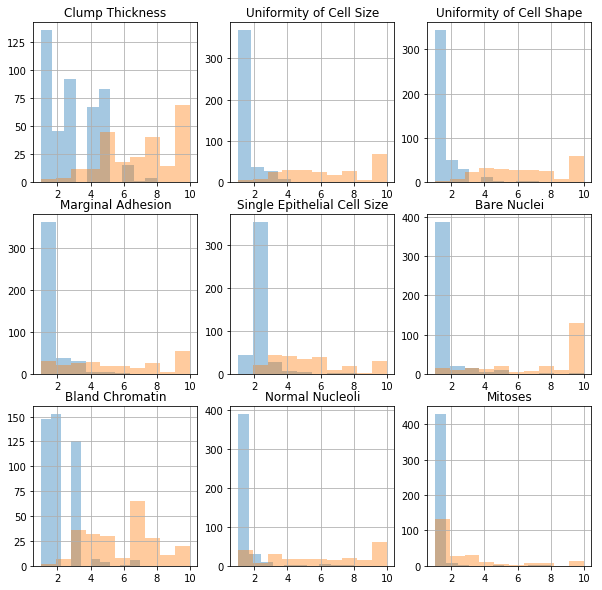

In [157]:
##data[data['Class']==0].hist(figsize=(15, 12),bins=10);
##data[data['Class']==1].hist(figsize=(15, 12),bins=10);

benign = data[data['Class']==0]
malignant = data[data['Class']==1]

#plt.figure(figsize=(10, 6))
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
fig

#data.groupby("Class")[].plot(kind='kde', ax=axs[1])
data.groupby("Class")['Clump Thickness'].hist(alpha=0.4, ax=axs[0, 0])
axs[0,0].set_title('Clump Thickness')
data.groupby("Class")['Uniformity of Cell Size'].hist(alpha=0.4, ax=axs[0, 1])
axs[0,1].set_title('Uniformity of Cell Size')
data.groupby("Class")['Uniformity of Cell Shape'].hist(alpha=0.4, ax=axs[0, 2])
axs[0,2].set_title('Uniformity of Cell Shape')
data.groupby("Class")['Marginal Adhesion'].hist(alpha=0.4, ax=axs[1, 0])
axs[1,0].set_title('Marginal Adhesion')
data.groupby("Class")['Single Epithelial Cell Size'].hist(alpha=0.4, ax=axs[1, 1])
axs[1,1].set_title('Single Epithelial Cell Size')
data.groupby("Class")['Bare Nuclei'].hist(alpha=0.4, ax=axs[1, 2])
axs[1,2].set_title('Bare Nuclei')
data.groupby("Class")['Bland Chromatin'].hist(alpha=0.4, ax=axs[2, 0])
axs[2,0].set_title('Bland Chromatin')
data.groupby("Class")['Normal Nucleoli'].hist(alpha=0.4, ax=axs[2, 1])
axs[2,1].set_title('Normal Nucleoli')
data.groupby("Class")['Mitoses'].hist(alpha=0.4, ax=axs[2, 2])
axs[2,2].set_title('Mitoses')


#data.Class


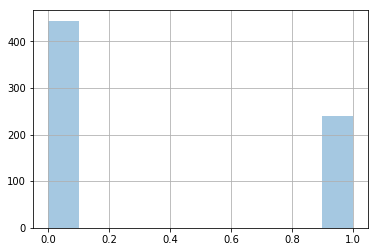

In [159]:
data['Class'].hist(alpha=0.4)

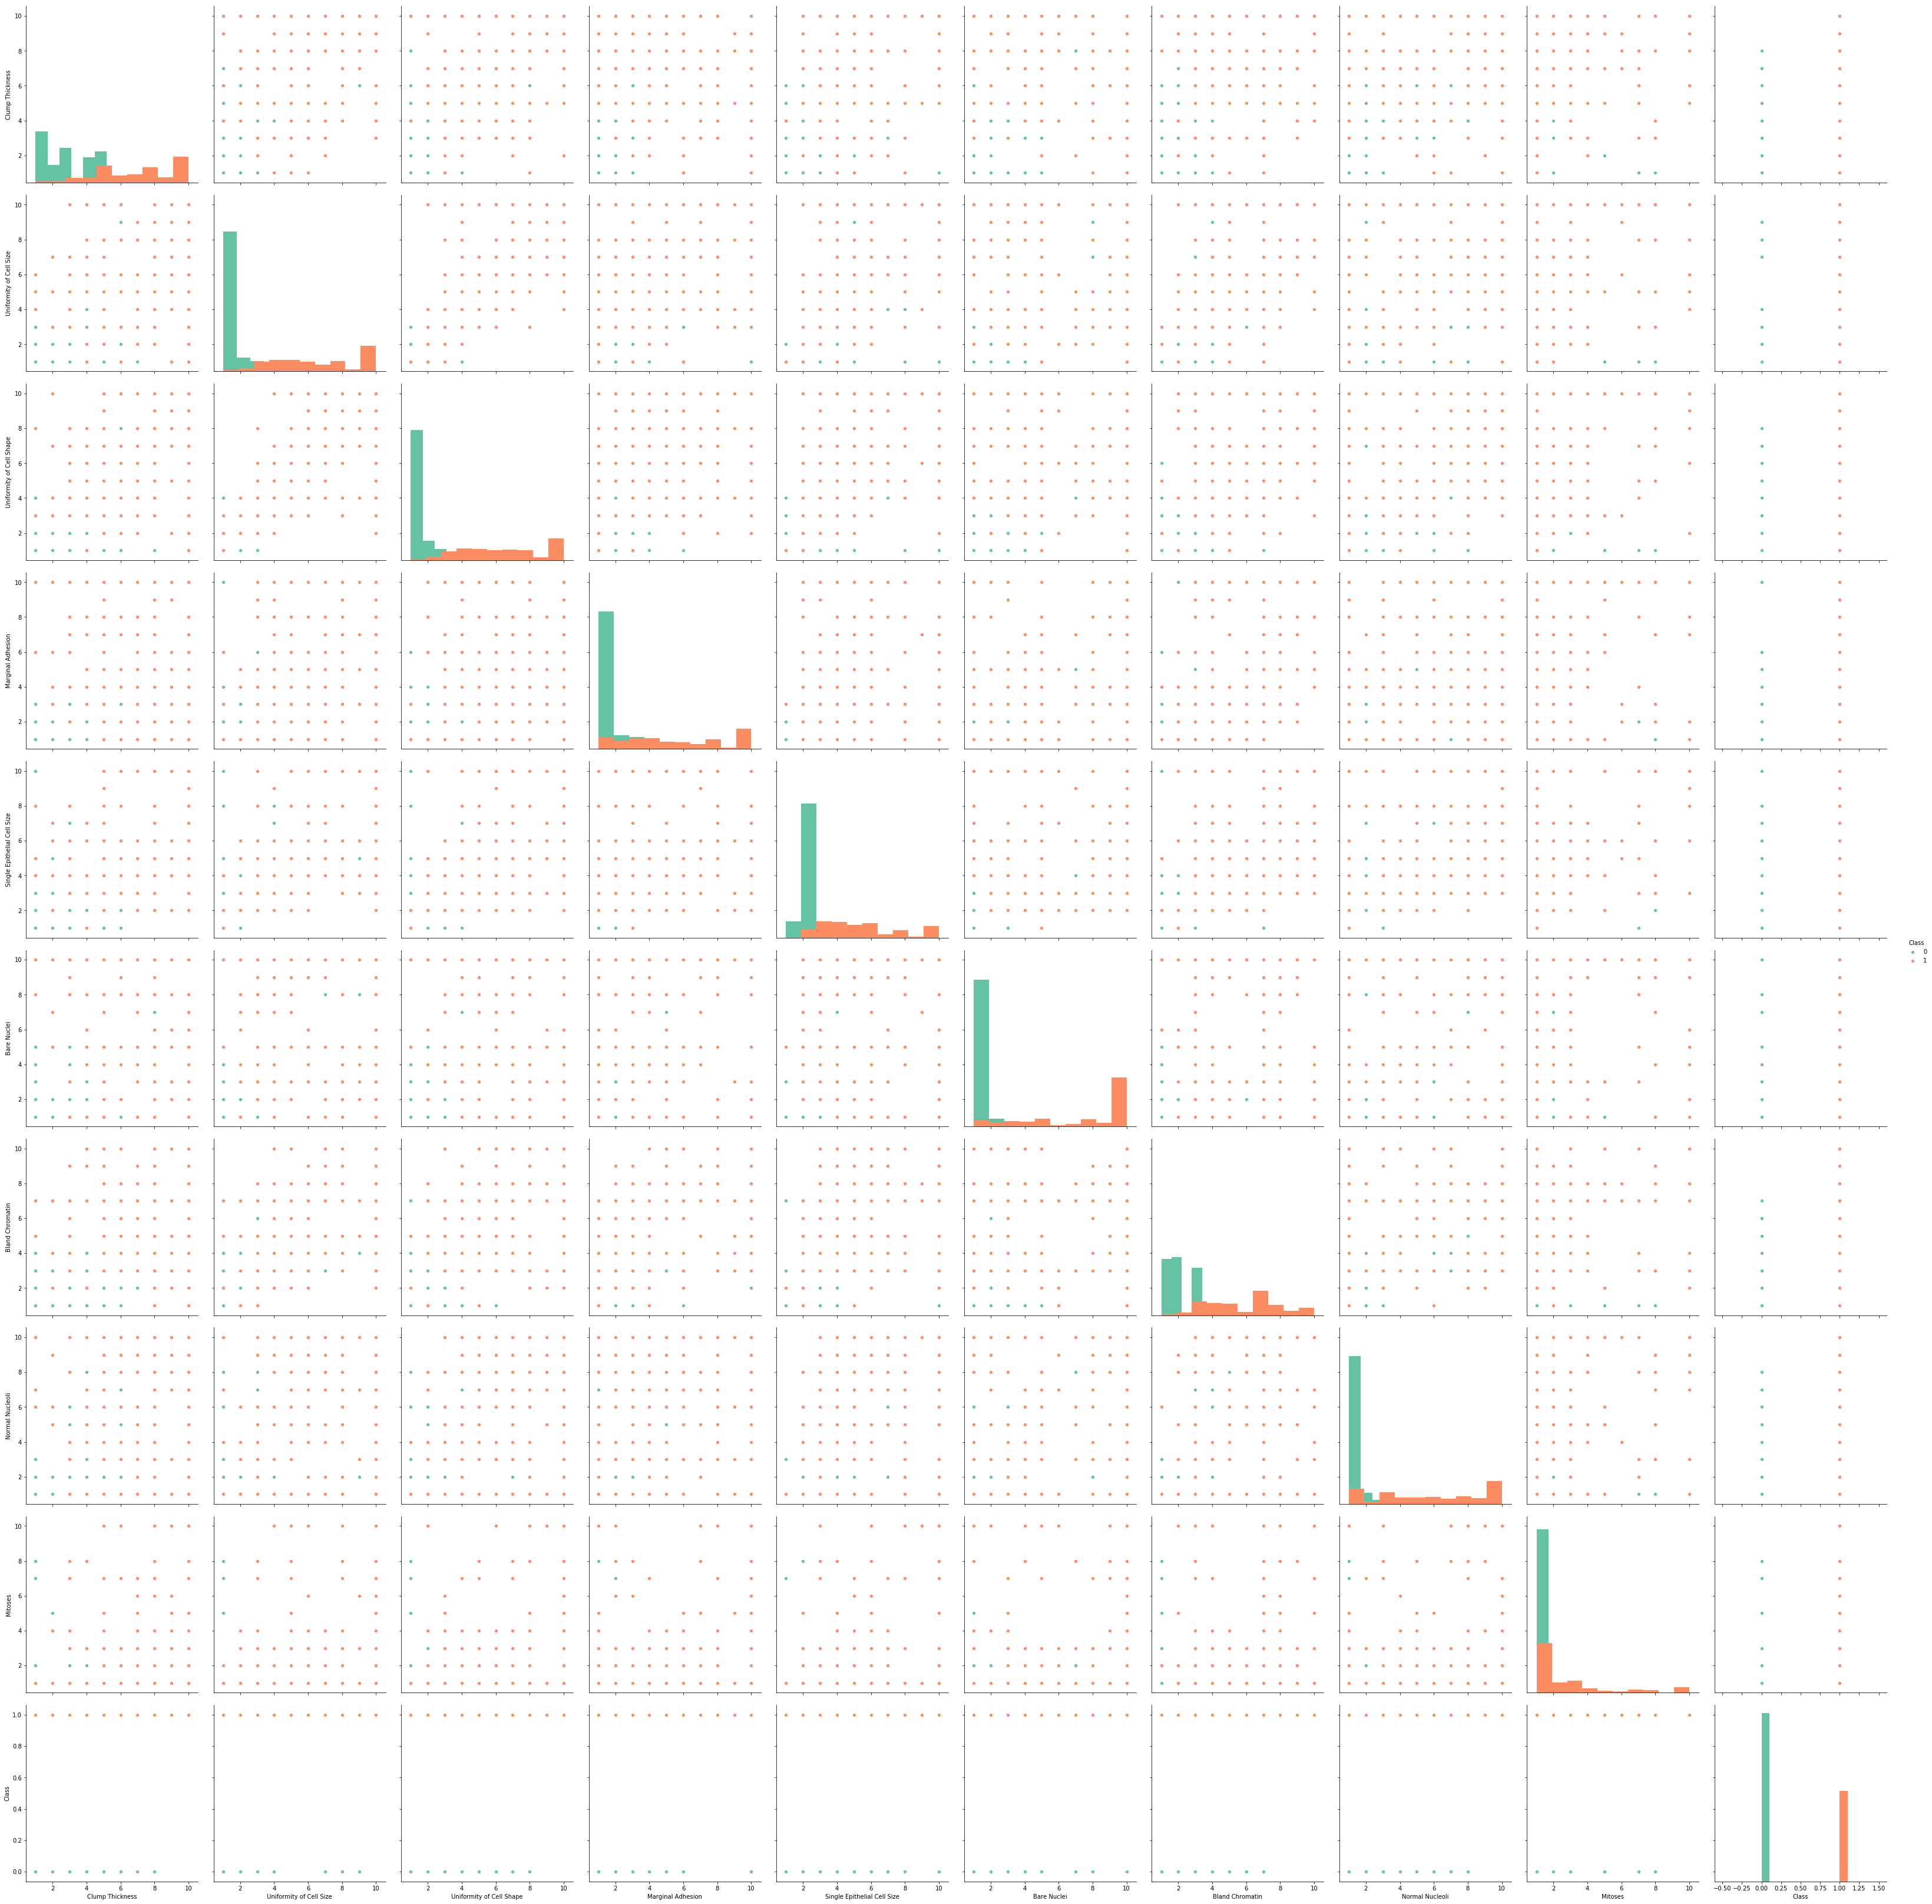

In [153]:
sns.pairplot(data=data, hue="Class", palette="Set2", diag_kind="hist", height=4.5);

<Figure size 360x360 with 0 Axes>

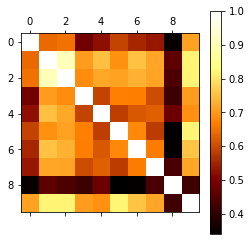

In [16]:
plt.figure(figsize=(5, 5));
plt.matshow(data.corr(),cmap='afmhot');
plt.colorbar();


## Modelling

In [78]:
# Load sklearn for data modelling
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


Let's first split the data into two datasets for Training and Testing

In [18]:
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

#X = data.iloc[:,:-1], 
#y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
scaler.fit(X_train.astype('float64'))

X_train = scaler.transform(X_train.astype('float64'))  
X_test = scaler.transform(X_test.astype('float64'))

### Logistic Regression model

In [163]:
logreg = LogisticRegression(C=1e6,solver='lbfgs',multi_class='auto')
logreg.fit(X_train, y_train.values.ravel())

y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

[[89  0]
 [ 6 42]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        89
           1       1.00      0.88      0.93        48

   micro avg       0.96      0.96      0.96       137
   macro avg       0.97      0.94      0.95       137
weighted avg       0.96      0.96      0.96       137

Accuracy of Logistic regression classifier on training set: 0.97
Accuracy of Logistic regression classifier on test set: 0.96


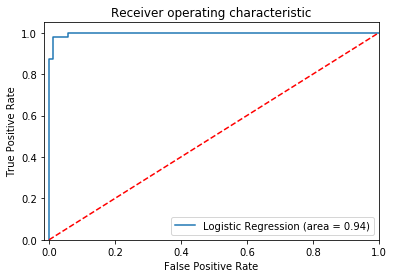

In [50]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.015, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [70]:
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
cross_validate(logreg, X, y.values.ravel(), cv=kfold, 
               scoring=('accuracy','precision', 'recall', 'roc_auc'),return_train_score=True)

{'fit_time': array([0.01090097, 0.00755811, 0.00652099, 0.00620389, 0.00599003]),
 'score_time': array([0.00883389, 0.00560164, 0.00341678, 0.00323319, 0.00309992]),
 'test_accuracy': array([0.95620438, 0.97080292, 0.97810219, 0.95588235, 0.97794118]),
 'train_accuracy': array([0.97252747, 0.96886447, 0.96703297, 0.97440585, 0.96892139]),
 'test_precision': array([0.92307692, 0.97959184, 0.95555556, 0.97619048, 0.95918367]),
 'train_precision': array([0.96276596, 0.95238095, 0.95854922, 0.95897436, 0.95789474]),
 'test_recall': array([0.96      , 0.94117647, 0.97727273, 0.89130435, 0.97916667]),
 'train_recall': array([0.95767196, 0.95744681, 0.94871795, 0.96891192, 0.95287958]),
 'test_roc_auc': array([0.98827586, 0.99886001, 0.99951124, 0.9968599 , 0.99479167]),
 'train_roc_auc': array([0.99811777, 0.99563176, 0.99557309, 0.99601885, 0.99660274])}

### Decision Trees

In [80]:
trees = DecisionTreeClassifier()
trees.fit(X_train, y_train.values.ravel())

y_pred = trees.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(trees.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(trees.score(X_test, y_test)))

[[89  0]
 [ 4 44]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        89
           1       1.00      0.92      0.96        48

   micro avg       0.97      0.97      0.97       137
   macro avg       0.98      0.96      0.97       137
weighted avg       0.97      0.97      0.97       137

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.97


### Gaussian Naive Bayes model

In [32]:
GaussNB = GaussianNB(priors=None);
GaussNB.fit(X_train, y_train.values.ravel());

y_pred = GaussNB.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'.format(GaussNB.score(X_test, y_test)))

[[88  1]
 [ 4 44]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        89
           1       0.98      0.92      0.95        48

   micro avg       0.96      0.96      0.96       137
   macro avg       0.97      0.95      0.96       137
weighted avg       0.96      0.96      0.96       137

Accuracy of GaussianNB classifier on test set: 0.96


### K Nearest Neighbors model

In [67]:
kNN = KNeighborsClassifier(n_neighbors=3)  
kNN.fit(X_train, y_train.values.ravel());

y_pred = kNN.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy of kNN classifier on test set: {:.2f}'.format(kNN.score(X_test, y_test)))

[[89  0]
 [ 3 45]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        89
           1       1.00      0.94      0.97        48

   micro avg       0.98      0.98      0.98       137
   macro avg       0.98      0.97      0.98       137
weighted avg       0.98      0.98      0.98       137

Accuracy of kNN classifier on test set: 0.98


2

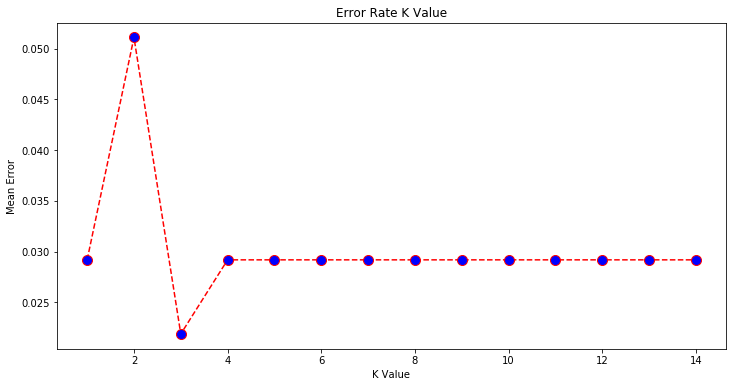

In [68]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 15):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train.values.ravel())
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test.values.ravel()))

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 15), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')
plt.ylabel('Mean Error')
error.index(min(error))


### SVM

In [86]:
svm = SVC()
svm.fit(X_train, y_train.values.ravel())


y_pred = svm.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train.values.ravel())))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test.values.ravel())))

[[88  1]
 [ 4 44]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        89
           1       0.98      0.92      0.95        48

   micro avg       0.96      0.96      0.96       137
   macro avg       0.97      0.95      0.96       137
weighted avg       0.96      0.96      0.96       137

Accuracy of SVM classifier on training set: 0.98
Accuracy of SVM classifier on test set: 0.96
